In [114]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib
from feature_eng import load_training_merged, check_same, create_merge_dict, freq_tab 
from fuzzywuzzy import fuzz, process
from pprint import pprint as pp
matplotlib.style.use('ggplot')

test_values=pd.read_csv('data/Test Set Values.csv')
train_values=pd.read_csv('data/Training Set Values.csv')
train_labels=pd.read_csv('data/Training Set Labels.csv')

# Helper function to highlight tables
def hl(val, min=0,max=1.01, color='yellow'):
    if min < val < max:
        return 'background-color: %s' % color
    else:
        return ''
    
# Merge training values w labels 
train=pd.merge(train_labels, train_values, how='inner', on='id')


In [139]:
# This may take a while
def replace_in_df(_df, _merge_dict):
"""takes in a dataframe and a dictionary (see create_merge_dict) and replaces all the list of values with the keys"""
    
    for i in reversed(sorted(_merge_dict)):
        against_list=list(_merge_dict[i])
        # find in dataframe
        df=_df.replace(against_list, i)
        return df
        

In [95]:
pd.Series(train.columns)

0                        id
1              status_group
2                amount_tsh
3             date_recorded
4                    funder
5                gps_height
6                 installer
7                 longitude
8                  latitude
9                  wpt_name
10              num_private
11                    basin
12               subvillage
13                   region
14              region_code
15            district_code
16                      lga
17                     ward
18               population
19           public_meeting
20              recorded_by
21        scheme_management
22              scheme_name
23                   permit
24        construction_year
25          extraction_type
26    extraction_type_group
27    extraction_type_class
28               management
29         management_group
30                  payment
31             payment_type
32            water_quality
33            quality_group
34                 quantity
35           quantit

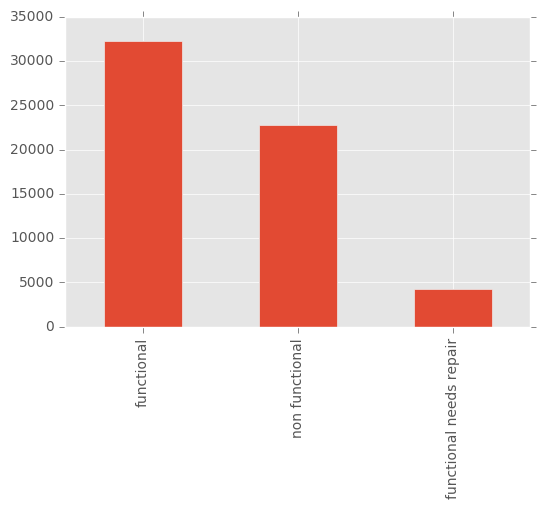

In [150]:
train['status_group'].value_counts().plot(kind="bar")
plt.show()

### Fuzzy String Matching

In [13]:
#### TODO: RUN ######

# Want to use on funder and and installer
# list of funders
funders = [i for i in train["funder"].unique() if ((type(i)!=int) and (type(i)!=float))]
merge_on=create_merge_dict(funders, 79)

##### Merge 

In [ ]:
# may take a while
train2=replace_in_df(train, merge_on)

In [152]:
# prints results to csv file
funders2= [ i for i in train2["funder"].unique() if ((type(i)!=int) and (type(i)!=float))]
funders2=sorted(funders2)
pd.Series(funders2).to_csv('funders2.csv')

#### Example iteration

In [190]:
xx=iter(range(0,5))
yy=iter(range(0,5))
next(yy)
while True:
    try:
        x=next(xx)
        y=next(yy)
        print('-----\n')
        print(x)
        print(y)
    except StopIteration:
        break


-----

0
1
-----

1
2
-----

2
3
-----

3
4


### Frequency Tables

In [7]:
# Frequency Table Example: Permit
permit_ct=pd.crosstab(index=train["status_group"], columns=train["permit"], margins=True)
permit_ct/permit_ct.ix['All']

permit                      False      True       All
status_group                                         
functional               0.517094  0.554437  0.542844
functional needs repair  0.075463  0.069417  0.071294
non functional           0.407443  0.376145  0.385862
All                      1.000000  1.000000  1.000000

In [8]:
# Frequency Table for Quantity vs Status Group
quant_ct = pd.crosstab(index=train["quantity"], columns=train["status_group"], margins=True)
# To divide by row totals use df.div(rowtotal, axis=0)
quant_ct.div(quant_ct["All"], axis=0)

status_group  functional  functional needs repair  non functional  All
quantity                                                              
dry             0.025136                 0.005924        0.968940  1.0
enough          0.652323                 0.072320        0.275357  1.0
insufficient    0.523234                 0.095842        0.380924  1.0
seasonal        0.574074                 0.102716        0.323210  1.0
unknown         0.269962                 0.017744        0.712294  1.0
All             0.543081                 0.072677        0.384242  1.0

##### Payment, Payment Type

In [27]:
freq_tab(train["payment"], train["payment_type"]).style.applymap(highlight)

##### Extraction Type, Group, Class

In [17]:
# Extraction Type, Group (type is superset of class)
freq_tab(train["extraction_type"], train["extraction_type_group"]).style.applymap(highlight)

In [14]:
    # Ext. Class, Group (class is a superset of group)
ft=freq_tab(train["extraction_type_class"], train["extraction_type_group"])
ft.style.applymap(highlight)

##### Source, Source Type, Source Class

In [19]:
freq_tab(train["source"], train["source_type"]).style.applymap(highlight) 
# source is a subset of source type

In [24]:
freq_tab(train["source"], train["source_class"]).style.applymap(highlight)
# source is a subset of source_class

In [26]:
freq_tab(train["source_class"], train["source_type"]).style.applymap(highlight)
# source type is a subset of source class

##### Funder vs. District Code

In [33]:
freq_tab(train["funder"], train["district_code"]).style.applymap(hl)

In [ ]:
# TODO public meating, .. name, amt, tsh

### Checking Unique Values

In [ ]:
# check the check equals

In [173]:
check_same(train["funder"], train["installer"])

funder has 1313 unique values 

installer has 2061 unique values 

2566 elements in funder or installer but not both: 
 {'Village council', 'GOVERN', 'KAWINGA', 'Yaole', 'MBIUWASA', 'rc ch', 'African Muslims Age', 'HEESAW', 'GD&ID', 'William Acles', 'Nssf', 'Care/cipro', 'SIMBA CO', 'DAWASA', 'Rotary Club of USA and Moshi', 'Martha Emanuel', 'KKKT _ Konde and DWE', 'Drv Na Idara', 'Juma Ndege', 'Kagera', 'Idara ya Maji', 'Hospi', 'Omari Mzee', 'UN ONE', 'Milenium', 'Halmashauri ya mburu', 'Wamarekani', 'KAEM', "lion's club", 'CG', 'Government /SDA', 'VILLAGE COUNCIL .ODA', 'WORLD NK', 'Privat', 'mwakalinga', 'CCT', 'Word', 'Village  Council', 'Patrick Nyanzwi', 'HesaWa', 'Sabemo', 'WINAMU CO', 'CARTAS', 'Wafidh', 'USAID', 'SERENS', 'Woyege', 'Onesm', 'Kwamdulu Estate', 'DESK a', 'TPP', 'ELCT', 'JESHI LA WOKOVU', 'Robert kampala', 'Kokeni', 'ANSWAR', 'Regina Group', 'DWE/Ubalozi wa Marekani', 'Lwf', 'CMSR', 'Rajab Seleman', 'Vw', 'Got', 'MANDIA CONSTRUCTION', 'World banks', 'Africa Isla

##### Waterpoint Type, Waterpoint Type Group

In [178]:
check_same(wpt, wptg)

waterpoint_type has 7 unique values 

waterpoint_type_group has 6 unique values 

1 elements in waterpoint_type or waterpoint_type_group but not both: 
 {'communal standpipe multiple'}
89.73% of elements are the same


##### Payment, Payment Type

In [179]:
check_same(train["payment"], train["payment_type"])

payment has 7 unique values 

payment_type has 7 unique values 

8 elements in payment or payment_type but not both: 
 {'per bucket', 'on failure', 'monthly', 'annually', 'pay annually', 'pay when scheme fails', 'pay per bucket', 'pay monthly'}
58.18% of elements are the same


In [118]:
# Number of unique values for each column [.unique vs .value_counts]
len_uniques = [len(train_values[i].unique()) for i in train_values.columns]
pd.DataFrame(len_uniques, index=train_values.columns, columns=['Unique Values'])

Unique Values
id                             59400
amount_tsh                        98
date_recorded                    356
funder                          1898
gps_height                      2428
installer                       2146
longitude                      57516
latitude                       57517
wpt_name                       37400
num_private                       65
basin                              9
subvillage                     19288
region                            21
region_code                       27
district_code                     20
lga                              125
ward                            2092
population                      1049
public_meeting                     3
recorded_by                        1
scheme_management                 13
scheme_name                     2697
permit                             3
construction_year                 55
extraction_type                   18
extraction_type_group             13
extraction_type_class              7
management                        12
management_group                   5
payment                            7
payment_type                       7
water_quality                      8
quality_group                      6
quantity                           5
quantity_group                     5
source                            10
source_type                        7
source_class                       3
waterpoint_type                    7
waterpoint_type_group              6

In [157]:
train["basin"].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani', 'Ruvuma / Southern Coast',
       'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)